# Steepest descent

In [24]:
using Plots, ForwardDiff, Printf, LinearAlgebra

# Steepest descent on quadratic with exact linesearch

In [25]:
#f(x) = 1/2 x'Ax + b'x (ignoring constant terms)
function grad_method_exact_ls(A, b, x0, ϵ=1e-6)
    x = copy(x0)
    ∇f = A*x + b
    k = 0
    xtrace = x'
    while norm(∇f) > ϵ
        
        α = dot(∇f,∇f) / dot(∇f,A*∇f)
        
        x = x - α*∇f
        ∇f = A*x + b
        f = (1/2)x'*A*x + b'*x
        @printf "it = %3d | |∇f| = %8.2e | f = %8.2e\n" k norm(∇f) f
        k += 1
        xtrace = vcat(xtrace,x')
    end
    return xtrace
end


grad_method_exact_ls (generic function with 2 methods)

In [26]:
#Apply to f(x) = x^2+2y^2
A = [1 0;0 2]
b = [0, 0]
x0 = [2, 1]
xtrace = grad_method_exact_ls(A, b, x0);

it =   0 | |∇f| = 9.43e-01 | f = 3.33e-01
it =   1 | |∇f| = 3.14e-01 | f = 3.70e-02
it =   2 | |∇f| = 1.05e-01 | f = 4.12e-03
it =   3 | |∇f| = 3.49e-02 | f = 4.57e-04
it =   4 | |∇f| = 1.16e-02 | f = 5.08e-05
it =   5 | |∇f| = 3.88e-03 | f = 5.65e-06
it =   6 | |∇f| = 1.29e-03 | f = 6.27e-07
it =   7 | |∇f| = 4.31e-04 | f = 6.97e-08
it =   8 | |∇f| = 1.44e-04 | f = 7.74e-09
it =   9 | |∇f| = 4.79e-05 | f = 8.60e-10
it =  10 | |∇f| = 1.60e-05 | f = 9.56e-11
it =  11 | |∇f| = 5.32e-06 | f = 1.06e-11
it =  12 | |∇f| = 1.77e-06 | f = 1.18e-12
it =  13 | |∇f| = 5.91e-07 | f = 1.31e-13


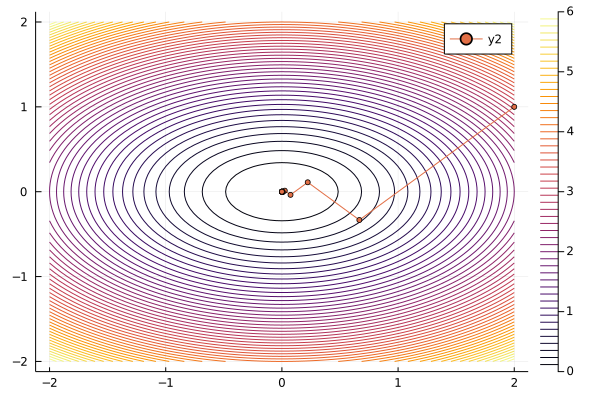

In [27]:
# contour plot
f(x1,x2) = (1/2)*[x1, x2]'*A*[x1, x2]+b'*[x1,x2]
x1 = -2:0.05:2
x2 = -2:0.05:2;

contour(x1, x2, f, levels = 50)
plot!(xtrace[:,1], xtrace[:,2], marker = 3)


In [28]:
#Apply to f(x) = x^2 + y^2/100
A = [1 0; 0 1/100]
b = [0, 0]
x0 = [2 ,1]
f(x) = x'*A*x + b'*x
∇f(x) = A*x + b
xtrace = grad_method_exact_ls(A, b, x0);

it =   0 | |∇f| = 9.90e-03 | f = 4.90e-03
it =   1 | |∇f| = 4.89e-03 | f = 1.20e-05
it =   2 | |∇f| = 2.42e-05 | f = 2.93e-08
it =   3 | |∇f| = 1.19e-05 | f = 7.16e-11
it =   4 | |∇f| = 5.91e-08 | f = 1.75e-13


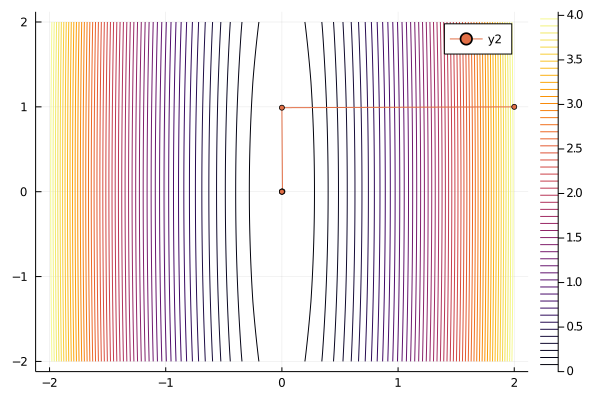

In [29]:
f(x1,x2) = x1^2 + x2^2/100
x1 = -2:0.05:2
x2 = -2:0.05:2
contour(x1, x2, f, levels = 50)
plot!(xtrace[:,1],xtrace[:,2],marker = 3)

In [31]:
#Gradient method with backtracking
function grad_method_backtracking(fObj, gObj, x0; ϵ = 1e-6, μ = 1e-5, maxits = 1000)
    x = copy(x0)
    f = fObj(x)
    ∇f = gObj(x)
    k = 0
    xtrace = x'
    while norm(∇f) > ϵ && k < maxits
        α = 1.0
        while ((f - fObj(x-α*∇f)) < μ*α*dot(∇f,∇f) )
            α /=2
        end
        x = x-α*∇f
        f = fObj(x)
        ∇f = gObj(x)
        k += 1
        xtrace = vcat(xtrace,x')
    end
    @printf "it = %3d | |∇f| = %8.2e | f = %8.2e\n" k norm(∇f) f
    return x, xtrace
end




grad_method_backtracking (generic function with 1 method)

In [32]:
#Apply gradient method with backtracking to Rosenbrock function
f(x) = 100(x[2]-x[1]^2)^2+(1-x[1])^2
∇f(x) = ForwardDiff.gradient(f,x)
x0 = [2,5]
x, xtrace = grad_method_backtracking(f, ∇f, x0, μ = 1e-4, maxits = 1000);

it = 1000 | |∇f| = 1.56e+00 | f = 1.33e+00


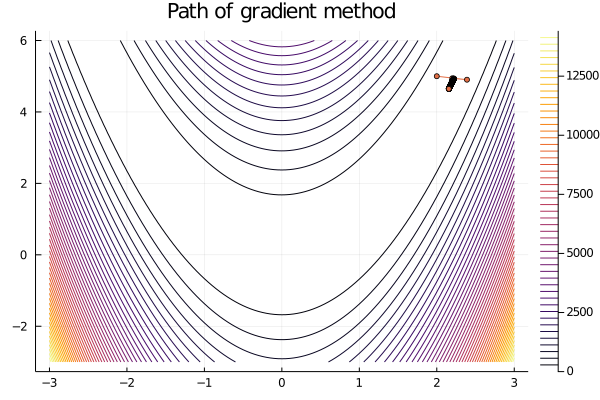

In [35]:
#Contour plot
f(x1,x2) = 100(x2-x1^2)^2+(1-x1)^2
x1 = -3:0.05:3
x2 = -3:0.05:6
contour(x1, x2, f, levels = 50)
plot!(xtrace[:,1],xtrace[:,2],marker = 3,legend = false, title = "Path of gradient method")

In [36]:
Hf = [802 -400;-400 200]
κ=eigmax(Hf)/eigmin(Hf)

2508.0096012775152